In [1]:
import pandas as pd
import numpy as np

# Création d'une série temporelle
dates = pd.date_range(start='2024-07-01', periods=7, freq='D')
temperatures = [25.6, 26.3, 27.1, 26.8, 27.5, 28.2, 28.9]
ts = pd.Series(temperatures, index=dates)

# Affichage de la série temporelle
print("Série temporelle créée :")
print(ts)

Série temporelle créée :
2024-07-01    25.6
2024-07-02    26.3
2024-07-03    27.1
2024-07-04    26.8
2024-07-05    27.5
2024-07-06    28.2
2024-07-07    28.9
Freq: D, dtype: float64


In [2]:
# Sélection des températures pour mardi à vendredi
temp_weekdays = ts['2024-07-02':'2024-07-05']

# Calcul de la température moyenne
mean_temperature = temp_weekdays.mean()

print("Températures du mardi au vendredi :")
print(temp_weekdays)
print("\nTempérature moyenne sur cette période :", mean_temperature)

Températures du mardi au vendredi :
2024-07-02    26.3
2024-07-03    27.1
2024-07-04    26.8
2024-07-05    27.5
Freq: D, dtype: float64

Température moyenne sur cette période : 26.925


In [44]:
# Charger les données depuis le fichier CSV
file_path = '../Data/temperature_series_2024.csv'
ts = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# Afficher les premières lignes du DataFrame
# print(data.head())

# Calculer la moyenne mobile sur 7 jours
ts['7-day MA'] = ts['Temperature'].rolling(window=7).mean()
# Remplacer les NaN par la moyenne cumulée
ts['7-day MA'] = ts['7-day MA'].fillna(ts['Temperature'].expanding().mean())
# data['2024-01-01':'2024-02-29']

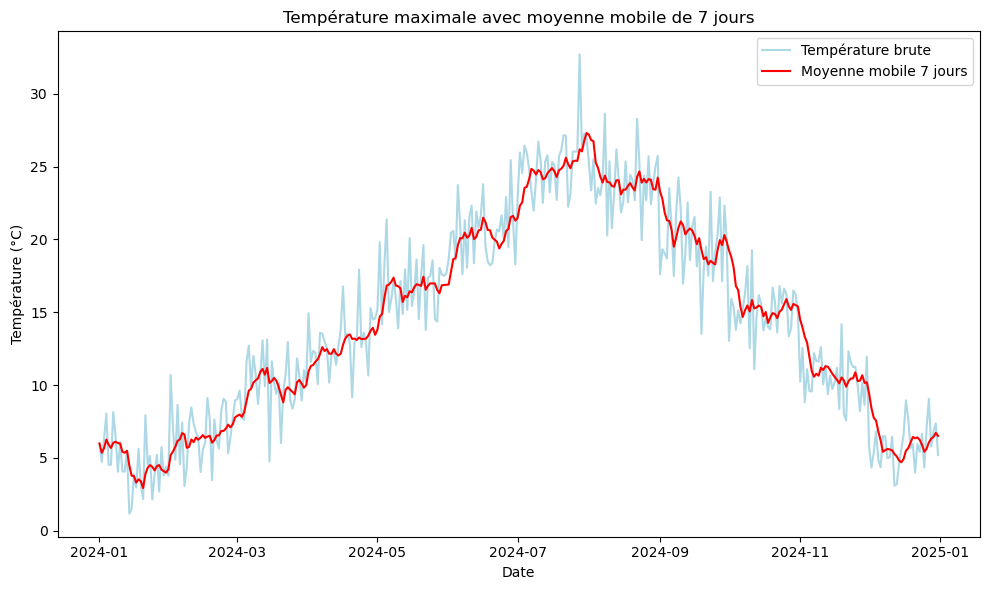

In [47]:
#weekly_ts = ts.resample('W').mean()
# weekly_ts
#ts

# Créer une nouvelle figure
plt.figure(figsize=(10, 6))

# Tracer les données brutes
plt.plot(ts.index, ts['Temperature'], label='Température brute', color='lightblue')


# Tracer la moyenne mobile de 7 jours
plt.plot(ts.index, ts['7-day MA'], label='Moyenne mobile 7 jours', color='red')

# Ajouter des titres et légendes
plt.title('Température maximale avec moyenne mobile de 7 jours')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()



In [46]:
ts

,Temperature,7-day MA
Date,,
2024-01-01,5.993428,5.993428
2024-01-02,4.723471,5.358450
2024-01-03,6.295377,5.670759
2024-01-04,8.046060,6.264584
2024-01-05,4.531693,5.918006
...,...,...
2024-12-27,9.065478,6.067963
2024-12-28,5.782480,6.323326
2024-12-29,6.803423,6.443390


            Temperature  Cumulative MA
Date                                  
2024-01-01           20      20.000000
2024-01-02           22      21.000000
2024-01-03           19      20.333333
2024-01-04           23      21.000000
2024-01-05           21      21.000000
2024-01-06           18      20.500000
2024-01-07           24      21.000000
2024-01-08           20      20.875000
2024-01-09           25      21.333333
2024-01-10           19      21.100000


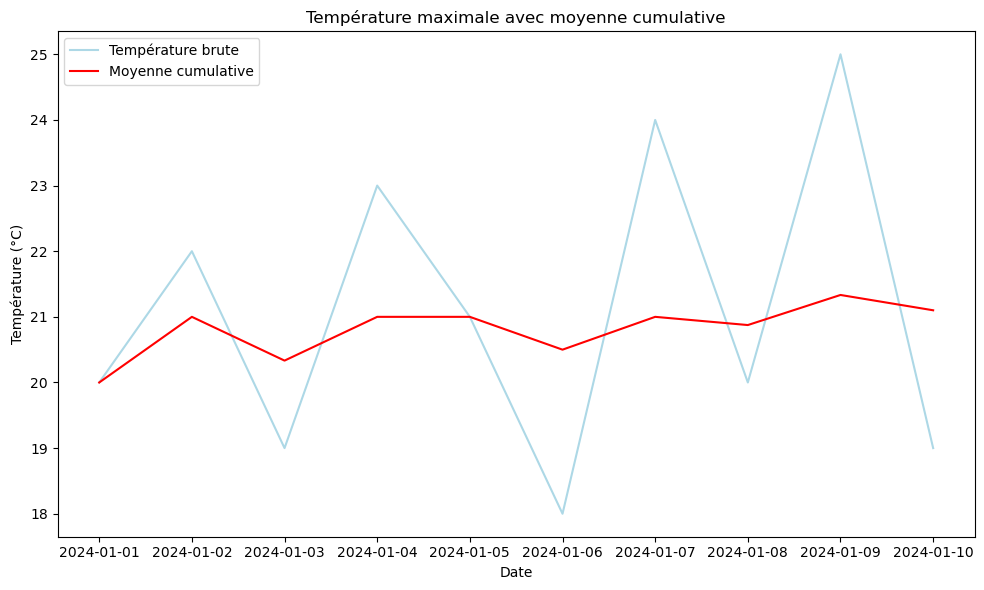

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Exemple de données de température
data = {
    'Date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
    'Temperature': [20, 22, 19, 23, 21, 18, 24, 20, 25, 19]
}

# Création du DataFrame
ts = pd.DataFrame(data)
ts.set_index('Date', inplace=True)

# Calcul de la moyenne cumulative
ts['Cumulative MA'] = ts['Temperature'].expanding().mean()

# Afficher les résultats
print(ts)

# Création du graphique
plt.figure(figsize=(10, 6))

# Tracer les données brutes
plt.plot(ts.index, ts['Temperature'], label='Température brute', color='lightblue')

# Tracer la moyenne cumulative
plt.plot(ts.index, ts['Cumulative MA'], label='Moyenne cumulative', color='red')

# Ajouter des titres et légendes
plt.title('Température maximale avec moyenne cumulative')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show();

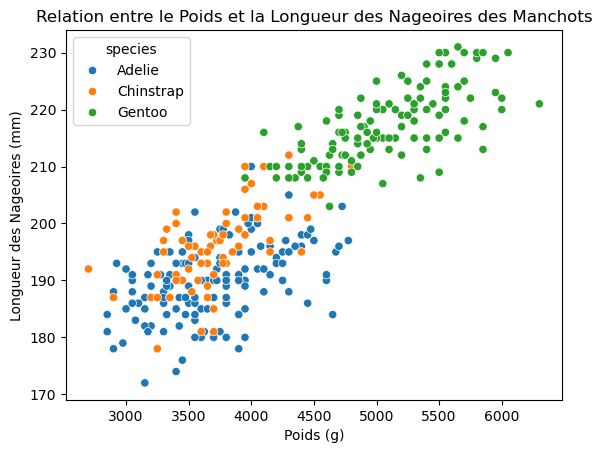

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le jeu de données
penguins = sns.load_dataset("penguins")

# Créer le diagramme à points
sns.scatterplot(data=penguins, x='body_mass_g', y='flipper_length_mm', hue='species', sizes=(20, 200))
# Ajouter des titres et des étiquettes
plt.title('Relation entre le Poids et la Longueur des Nageoires des Manchots')
plt.xlabel('Poids (g)')
plt.ylabel('Longueur des Nageoires (mm)')

# Afficher le graphique
plt.show();

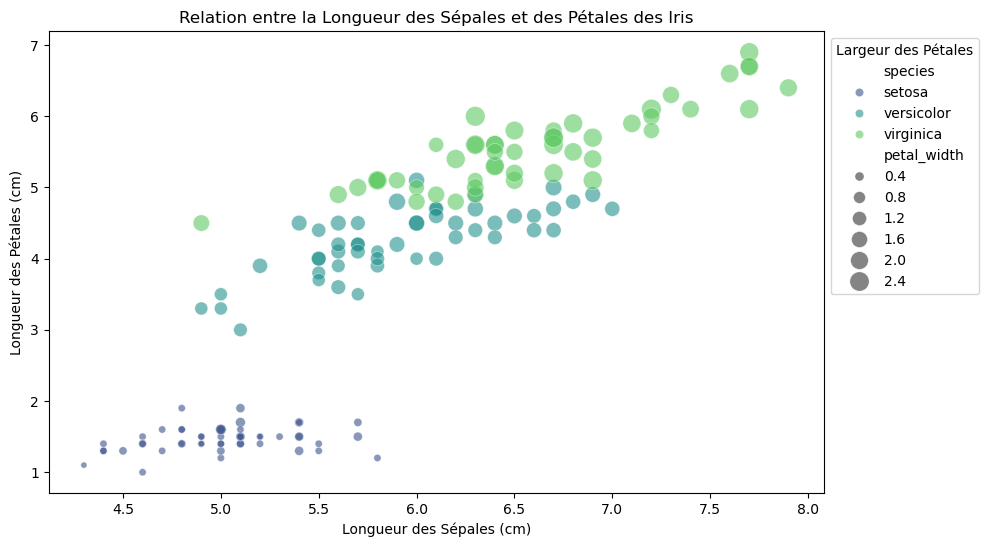

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Charger le jeu de données
iris = sns.load_dataset("iris")

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(
    data=iris,
    x='sepal_length', 
    y='petal_length', 
    hue='species',
    size='petal_width',
    sizes=(20, 200), # Taille minimale et maximale des points
    alpha=0.6,
    palette='viridis'
)

# Ajouter des titres et des étiquettes
plt.title('Relation entre la Longueur des Sépales et des Pétales des Iris')
plt.xlabel('Longueur des Sépales (cm)')
plt.ylabel('Longueur des Pétales (cm)')

# Afficher la légende des tailles
scatter_plot.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Largeur des Pétales')

# Afficher le graphique
plt.show()